In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv("/content/drive/MyDrive/cleaned_taxi.csv")


In [24]:
df.dtypes

vendor_id                  int64
pickup_datetime           object
dropoff_datetime          object
passenger_count            int64
trip_distance            float64
rate_code                  int64
store_and_fwd_flag        object
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
imp_surcharge            float64
total_amount             float64
pickup_location_id         int64
dropoff_location_id        int64
weekday                   object
month                      int64
weekday_num                int64
pickup_hour                int64
trip_duration             object
trip_duration_seconds    float64
speed                    float64
dtype: object

In [5]:
df.shape

(5646201, 24)

In [12]:
X = df[['pickup_hour', 'weekday_num', 'month', 'pickup_location_id', 'dropoff_location_id', 'trip_distance','trip_duration_seconds','rate_code']]
Y = df['speed']

print("Input Features (X):")
print(X.head())

print("\nTarget Variable (Y):")
print(Y.head())

Input Features (X):
   pickup_hour  weekday_num  month  pickup_location_id  dropoff_location_id  \
0           13            3      3                 161                    1   
1           13            3      3                  13                  230   
2           14            3      3                 100                   87   
3           15            3      3                 144                  161   
4           15            3      3                  87                    1   

   trip_distance  trip_duration_seconds  rate_code  
0          18.15                 2388.0          3  
1           4.59                 2295.0          1  
2           5.80                 1608.0          1  
3           3.38                 2554.0          1  
4          16.98                 5267.0          3  

Target Variable (Y):
0    27.361809
1     7.200000
2    12.985075
3     4.764291
4    11.605848
Name: speed, dtype: float64


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [29]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout

# Define input shape (number of features)
input_shape = X_train.shape[1]

# Define LSTM model with additional layers
model_lstm = tf.keras.Sequential([
    Input(shape=(input_shape, 1)),  # Input shape: (number of features, 1) for LSTM
    LSTM(64, activation='relu', return_sequences=True),  # LSTM layer with 64 units and return sequences
    Dropout(0.2),  # Dropout layer for regularization
    LSTM(64, activation='relu'),  # Second LSTM layer with 64 units
    Dropout(0.2),  # Dropout layer for regularization
    Dense(32, activation='relu'),  # Dense layer with 32 units and ReLU activation
    Dense(1, activation='linear')  # Output layer with 1 neuron (for regression)
])

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Display model summary
model_lstm.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 8, 64)             16896     
                                                                 
 dropout_10 (Dropout)        (None, 8, 64)             0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 52033 (203.25 KB)
Trainable params: 5203

In [15]:
import numpy as np

# Convert DataFrame to numpy array
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

# Reshape input data for LSTM model
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], X_test_array.shape[1], 1)

# Train the model
history = model.fit(X_train_reshaped, Y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, Y_test))

# Evaluate the model
loss = model.evaluate(X_test_reshaped, Y_test)

# Make predictions
predictions = model.predict(X_test_reshaped)


Epoch 1/10
123511/123511 [==============================] - 913s 7ms/step - loss: 3.9344 - val_loss: 8.9700
Epoch 2/10
123511/123511 [==============================] - 916s 7ms/step - loss: 1.9546 - val_loss: 10.6383
Epoch 3/10
123511/123511 [==============================] - 941s 8ms/step - loss: 1.2569 - val_loss: 7.4930
Epoch 4/10
123511/123511 [==============================] - 924s 7ms/step - loss: 1.8267 - val_loss: 8.4793
Epoch 5/10
123511/123511 [==============================] - 918s 7ms/step - loss: 1.7621 - val_loss: 7.4639
Epoch 6/10
123511/123511 [==============================] - 950s 8ms/step - loss: 48903.1406 - val_loss: 9.9672
Epoch 7/10
123511/123511 [==============================] - 922s 7ms/step - loss: 116.6894 - val_loss: 4.0445
Epoch 8/10
123511/123511 [==============================] - 929s 8ms/step - loss: 7.9184 - val_loss: 5.7271
Epoch 9/10
123511/123511 [==============================] - 945s 8ms/step - loss: 17.0751 - val_loss: 9.0384
Epoch 10/10
52934/52

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared score
r2 = r2_score(Y_test, predictions)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2)


Mean Absolute Error: 3.1944497510274403
Mean Squared Error: 12.755090345039429
Root Mean Squared Error: 3.5714269340194305
R2 Score: 0.8423397974500084


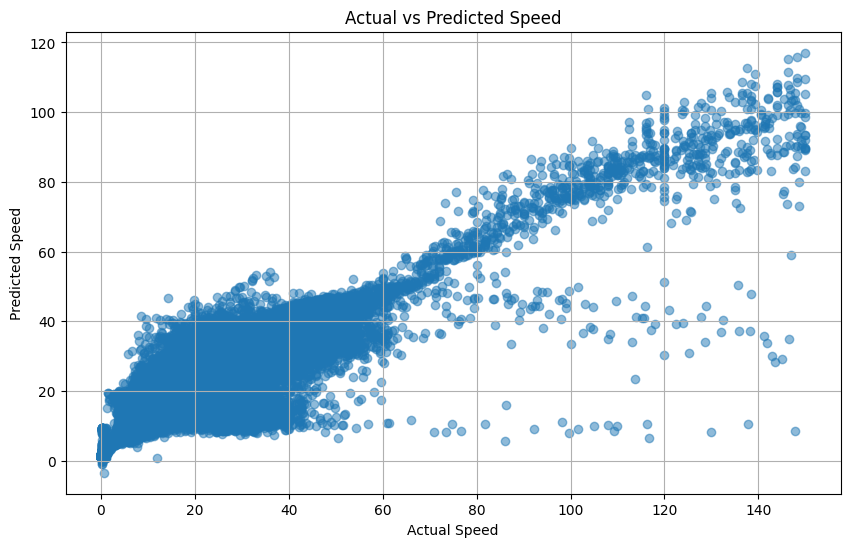

In [17]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, predictions, alpha=0.5)
plt.xlabel('Actual Speed')
plt.ylabel('Predicted Speed')
plt.title('Actual vs Predicted Speed')
plt.grid(True)
plt.show()


In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Layer

class RBMLayer(Layer):
    def __init__(self, n_components, activation='sigmoid', **kwargs):
        super(RBMLayer, self).__init__(**kwargs)
        self.n_components = n_components
        self.activation = activation
        self.rbm = tf.keras.layers.Dense(n_components, activation=activation)

    def call(self, inputs):
        return self.rbm(inputs)

# Define the input shape
input_shape = X_train.shape[1]

# Initialize the DBN model
model_dbn = Sequential()

# Add the first RBM layer
model_dbn.add(RBMLayer(n_components=64))
model_dbn.add(Dense(64, activation='relu'))
model_dbn.add(Dropout(0.2))

# Add the second RBM layer
model_dbn.add(RBMLayer(n_components=32))
model_dbn.add(Dense(32, activation='relu'))
model_dbn.add(Dropout(0.2))

# Add the output layer
model_dbn.add(Dense(1, activation='linear'))

# Compile the model
model_dbn.compile(optimizer='adam', loss='mean_squared_error')

# Build the model by calling the build() method or passing a batch of data
# model_dbn.build(input_shape)  # Uncomment this line if you want to explicitly build the model
# OR
model_dbn.predict(X_train[:1])  # Pass a batch of data through the model to build it implicitly

# Display the model summary
model_dbn.summary()



1/1 [==============================] - 0s 154ms/step
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rbm_layer_6 (RBMLayer)      (None, 64)                576       
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 rbm_layer_7 (RBMLayer)      (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 32)                1056      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 

In [23]:
# Train the model
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

# Make predictions
predictions = model.predict(X_test)

# Evaluate accuracy
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Epoch 1/10
123511/123511 [==============================] - 218s 2ms/step - loss: 11.5523 - val_loss: 4.8881
Epoch 2/10
123511/123511 [==============================] - 212s 2ms/step - loss: 6.0621 - val_loss: 4.0834
Epoch 3/10
123511/123511 [==============================] - 210s 2ms/step - loss: 5.5205 - val_loss: 4.0463
Epoch 4/10
123511/123511 [==============================] - 250s 2ms/step - loss: 5.3085 - val_loss: 3.6507
Epoch 5/10
123511/123511 [==============================] - 251s 2ms/step - loss: 5.0457 - val_loss: 3.5141
Epoch 6/10
123511/123511 [==============================] - 211s 2ms/step - loss: 4.7453 - val_loss: 3.2566
Epoch 7/10
123511/123511 [==============================] - 210s 2ms/step - loss: 5.7212 - val_loss: 20.5437
Epoch 8/10
123511/123511 [==============================] - 249s 2ms/step - loss: 4.4620 - val_loss: 12.1959
Epoch 9/10
123511/123511 [==============================] - 251s 2ms/step - loss: 4.3577 - val_loss: 14.4976
Epoch 10/10
52934/52934 

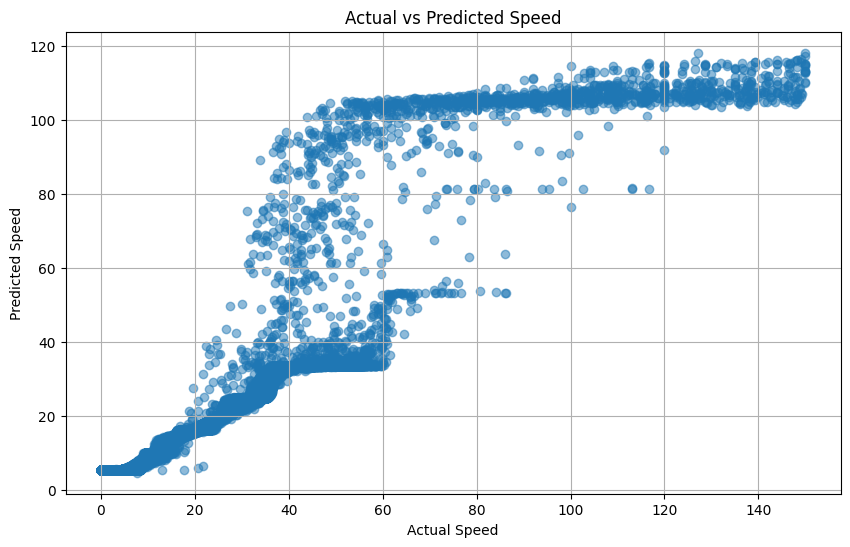

In [25]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, predictions, alpha=0.5)
plt.xlabel('Actual Speed')
plt.ylabel('Predicted Speed')
plt.title('Actual vs Predicted Speed')
plt.grid(True)
plt.show()